<a href="https://colab.research.google.com/github/itzrubyy/engineers_salary_prediction/blob/main/_engineer_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Salary Data.csv')
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
df.drop(columns=['Age'], inplace=True, axis=1)

In [6]:
df.head()

,Gender,Education Level,Job Title,Years of Experience,Salary
0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,Female,Master's,Data Analyst,3.0,65000.0
2,Male,PhD,Senior Manager,15.0,150000.0
3,Female,Bachelor's,Sales Associate,7.0,60000.0
4,Male,Master's,Director,20.0,200000.0


In [7]:
df.isnull().sum()

Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [8]:
df = df.dropna().reset_index(drop=True)

In [9]:
df.isnull().sum()

Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

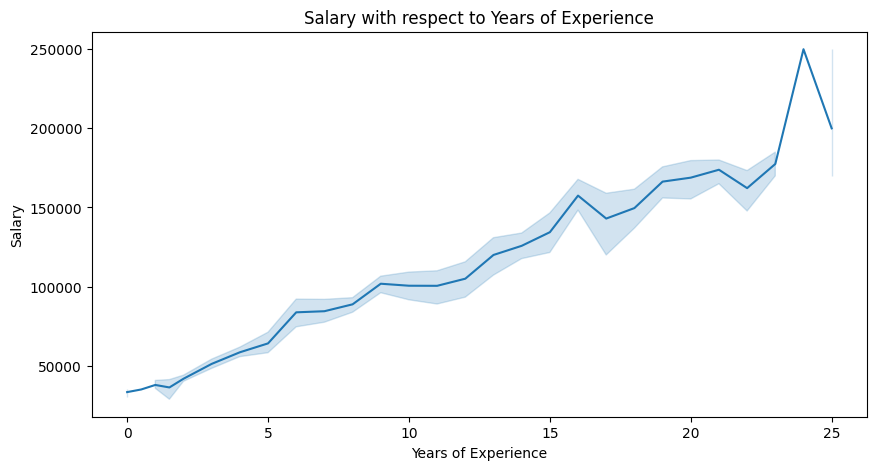

In [100]:
# Showing graph of salary with respect to years of experience

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Years of Experience', y='Salary')
plt.title('Salary with respect to Years of Experience')
plt.show()

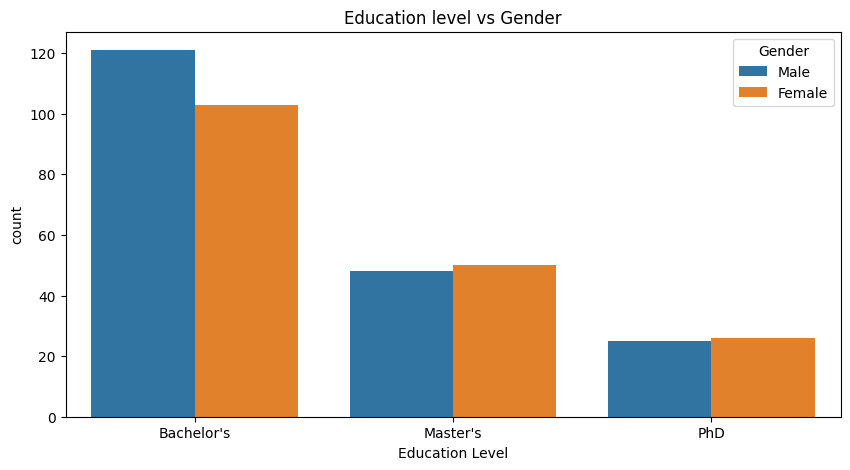

In [102]:
#Education level vs Gender
# Male blue color and female orange color

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Education Level', hue='Gender')
plt.title('Education level vs Gender')
plt.show()

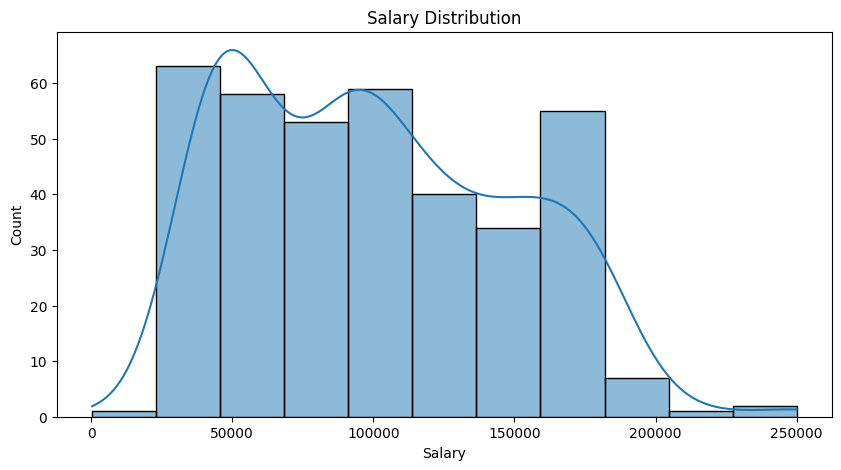

In [103]:
#hist

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Salary', kde=True)
plt.title('Salary Distribution')
plt.show()

In [10]:
X = df.drop(columns=['Salary'], axis=1)
y = df["Salary"]

In [11]:
X["Gender"].value_counts()

Gender
Male      194
Female    179
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

age_encoder = LabelEncoder()

X["Gender"] = age_encoder.fit_transform(X["Gender"])

In [75]:
import pickle

with open('age_encoder.pkl', 'wb') as file:
    pickle.dump(age_encoder, file)

In [13]:
X["Gender"].value_counts()

Gender
1    194
0    179
Name: count, dtype: int64

In [14]:
X["Education Level"].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [15]:
X["Job Title"].value_counts()

Job Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64

In [27]:
cat_features = X.select_dtypes(include='object').columns
neumeric_features = X.select_dtypes(exclude='object').columns

In [33]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

sc = StandardScaler()
ohe = OneHotEncoder(
    drop='first',
    handle_unknown='ignore'
)

preprocessor = ColumnTransformer(
    [
        ('standard_scaler',sc,neumeric_features),
        ('onehot_scaler',ohe,cat_features),
    ],
    remainder='passthrough'
)

In [76]:
import pickle

with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [37]:
pd.DataFrame(X_train).head()

,0
0,"(0, 0)\t0.9866660700433731\n (0, 1)\t-0.469..."
1,"(0, 0)\t0.9866660700433731\n (0, 1)\t-0.007..."
2,"(0, 0)\t-1.013514126371084\n (0, 1)\t-1.237..."
3,"(0, 0)\t0.9866660700433731\n (0, 1)\t-0.776..."
4,"(0, 0)\t-1.013514126371084\n (0, 1)\t-0.469..."


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

rand = RandomForestRegressor()
tree = DecisionTreeRegressor()
log = LogisticRegression()


rand_params = {
    'n_estimators':[10, 20, 50, 100,],
    'max_depth':[None, 2, 5, 10],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}

tree_params = {
    'max_depth':[None, 2, 5, 10],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}

log_params = {
    'C':[0.01, 0.1, 1, 10, 100]
}

models = {
    'Random Forest':(rand, rand_params),
    'Decision Tree':(tree, tree_params),
    'Logistic Regression':(log, log_params)
}

In [68]:
report = {}

for i in range(len(list(models))):
  # report = {}
  model = list(models.values())[i][0]
  params = list(models.values())[i][1]
  print("*************************")
  print(f"Currently {model} is evaluating...")
  model.fit(X_train, y_train)

  grid = GridSearchCV(model, params, cv=5)
  grid.fit(X_train, y_train)

  print(f"Setting best params for {model}....")
  print(f"Best params for {model}: {grid.best_params_}")

  model.set_params(**grid.best_params_)

  model.fit(X_train, y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  print(f"{model} training is completed...")
  print(f"Training Accuracy score: {r2_score(y_train, y_train_pred)}")
  print(f"Testing Accuracy score: {r2_score(y_test, y_test_pred)}")
  print(f"Loss Function score: {(r2_score(y_train, y_train_pred))-(r2_score(y_test, y_test_pred))}")
# Store the results of each model in report

  report[list(models.values())[i][0]] = r2_score(y_test, y_test_pred)
  print(f"Stored the result for {model} in Report...")


  print("*************************")




*************************
Currently RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=50) is evaluating...
Setting best params for RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=50)....
Best params for RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=50): {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}
RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=20) training is completed...
Training Accuracy score: 0.9323747718159154
Testing Accuracy score: 0.909447111198676
Loss Function score: 0.022927660617239387
Stored the result for RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=20) in Report...
*************************
*************************
Currently DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=10) is evaluating...
Setting best params for DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=10)....
Best para

In [69]:
result = report
result

{RandomForestRegressor(max_depth=5, min_samples_leaf=2, n_estimators=20): 0.909447111198676,
 DecisionTreeRegressor(min_samples_split=10): 0.8289139523009061,
 LogisticRegression(C=10): 0.8718153102384625}

In [73]:
best_model = max(result, key=result.get)

In [74]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [77]:
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

with open('preprocessor.pkl', 'rb') as file:
    preprocessor = pickle.load(file)

with open('age_encoder.pkl', 'rb') as file:
    age_encoder = pickle.load(file)


In [94]:
test_data = {
    'Gender': 'Male',
    # 'Age': 25,
    'Education Level': 'Bachelor\'s Degree',
    'Job Title': 'Software Engineer',
    'Years of Experience': 15
}

test_df = pd.DataFrame([test_data])

In [95]:
test_df["Gender"] = age_encoder.transform(test_df["Gender"])

In [96]:
test_df

,Gender,Education Level,Job Title,Years of Experience
0,1,Bachelor's Degree,Software Engineer,15


In [97]:
ca_features = test_df.select_dtypes(include='object').columns
neumeric_features = test_df.select_dtypes(exclude='object').columns

In [98]:
test_df = preprocessor.transform(test_df)

In [99]:
result = model.predict(test_df)

print(f"Predicted salary based on input is {result[0]}")

Predicted salary based on input is 115570.17669830172
